In [7]:
import pandas as pd
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pd.read_csv('reviews.csv', parse_dates=['Timestamp'])


In [8]:
data['Day'] = data['Timestamp'].dt.date

day_average = data.groupby(['Day']).mean()
day_average.head()

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077


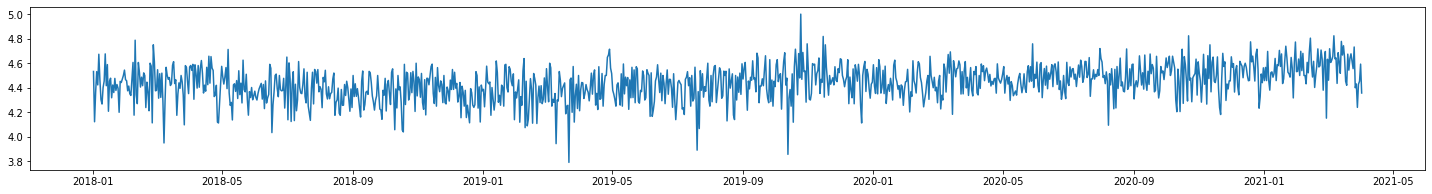

In [10]:
plt.figure(figsize=(25,3))
plt.plot(day_average.index, day_average['Rating'])

# rating average by week

In [13]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
data['Week']

0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Week, Length: 45000, dtype: object

In [15]:
week_average = data.groupby(['Week']).mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


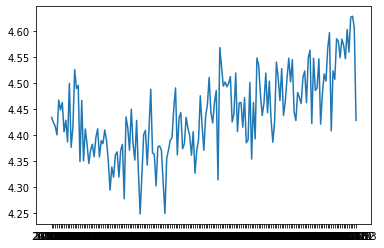

In [17]:
plt.plot(week_average.index, week_average['Rating'])

# average rating per month

                                         Course Name  \
0  The Python Mega Course: Build 10 Real World Ap...   
1  The Python Mega Course: Build 10 Real World Ap...   
2  The Python Mega Course: Build 10 Real World Ap...   
3  The Python Mega Course: Build 10 Real World Ap...   
4  The Python Mega Course: Build 10 Real World Ap...   

                  Timestamp  Rating Comment         Day     Week    Month  
0 2021-04-02 06:25:52+00:00     4.0     NaN  2021-04-02  2021-13  2021-04  
1 2021-04-02 05:12:34+00:00     4.0     NaN  2021-04-02  2021-13  2021-04  
2 2021-04-02 05:11:03+00:00     4.0     NaN  2021-04-02  2021-13  2021-04  
3 2021-04-02 03:33:24+00:00     5.0     NaN  2021-04-02  2021-13  2021-04  
4 2021-04-02 03:31:49+00:00     4.5     NaN  2021-04-02  2021-13  2021-04  


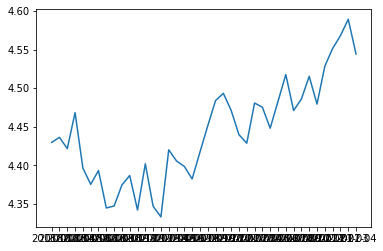

In [19]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
print(data.head())
month_average = data.groupby(['Month']).mean()
plt.plot(month_average.index, month_average['Rating'])

# average rating by month by course

In [21]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         
2019-09                                               4.531250         
2019-10                                               4.287500         
2019-11                                               4.512195         
2019-12                                               4.152778         
2020-01                                               4.277778         
2020-02                                               4.200000         
2020-03                                               4.240000         
2020-04                                               4.329268         
2020-05                                               4.340909         
2020-06                                               4.397059         
2020-07                                               4.250000         
2020-08                                               4.121622         
2020-09                                               4.307692         
2020-10                                               4.366667         
2020-11                                               4.461538         
2020-12                                               4.294118         
2021-01                                               4.283333         
2021-02                                               4.450000         
2021-03                                               4.190476         
2021-04                                               4.500000         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11         

<AxesSubplot:xlabel='Month'>

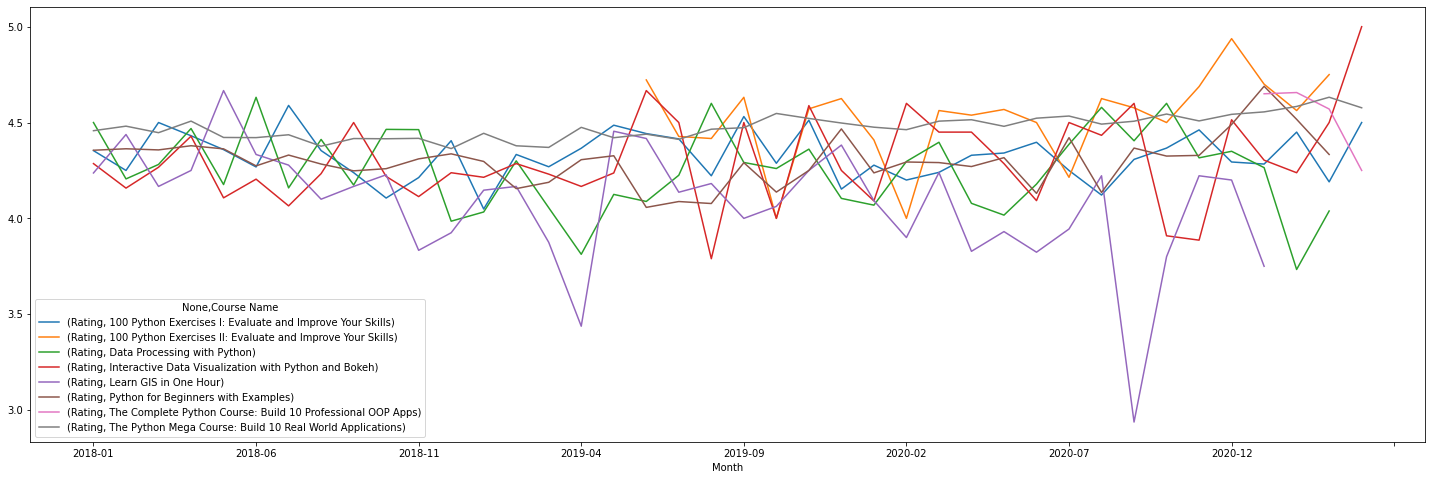

In [22]:
month_average_crs.plot(figsize=(25,8))

# What day are people the happiest?

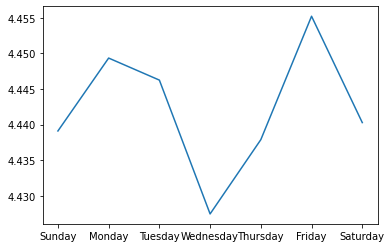

In [28]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])